<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/pandas/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import pandas as pd
import numpy as np


dti = pd.to_datetime(
        ["1/1/2018", np.datetime64("2018-01-01"), datetime.datetime(2018, 1, 1)]
    )

dti


DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
#  generate sequence

pd.date_range("2018-01-01", periods=3, freq="h")

dti



DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
dti = dti.tz_localize("UTC")

dti.tz_convert("US/Pacific")

dti

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:00:00+00:00',
               '2018-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [ ]:
idx = pd.date_range("2018-01-01", periods=5, freq="h")
ts = pd.Series(range(len(idx)), index=idx)

ts



2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [ ]:
ts.resample("2h").mean()

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [ ]:
#Resampling or converting a time series to a particular frequency

friday = pd.Timestamp("2018-01-05")

print(friday.day_name())

saturday = friday + pd.Timedelta("1 day")

print(saturday.day_name())


# Add 1 business day (Friday --> Monday)
monday = friday + pd.offsets.BDay()

print(monday.day_name())

print(monday)

Friday
Saturday
Monday
2018-01-08 00:00:00


In [ ]:
pd.Timestamp(pd.NaT)

NaT

In [ ]:
ts = pd.Timestamp('2017-01-01T12')
ts

Timestamp('2017-01-01 12:00:00')

In [ ]:
date=pd.date_range("2018-01-01", periods=7, freq="D")
number=np.linspace(1,7,7)

data=pd.DataFrame(number,index=date)

data

,0
2018-01-01,1.0
2018-01-02,2.0
2018-01-03,3.0
2018-01-04,4.0
2018-01-05,5.0
2018-01-06,6.0
2018-01-07,7.0


<Axes: >

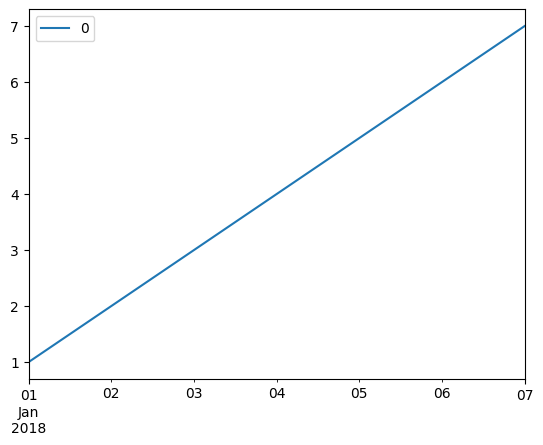

In [ ]:
data.plot()

In [ ]:
data.columns

RangeIndex(start=0, stop=7, step=1)